In [1]:
import numpy as np
import matplotlib.pyplot as plt

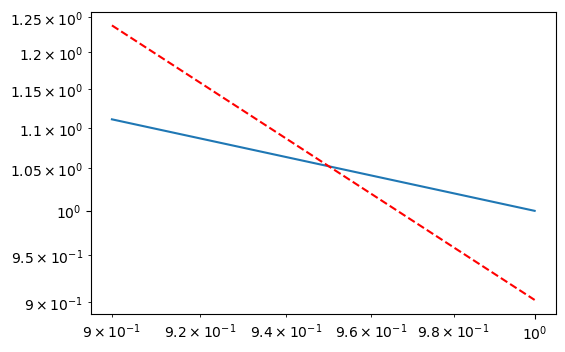

In [4]:
r=np.linspace(0.9,1,2000)
y1=1/r
y2=0.95**2/r**3

fig=plt.figure(dpi=100)
plt.loglog(r,y1)
plt.loglog(r,y2,'r--')
plt.show()

In [1]:
from scipy.integrate import odeint

/home/xiaoliang/miniconda3/envs/vscode/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/xiaoliang/miniconda3/envs/vscode/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [16]:
def fun(Y,r):
    dG=Y[1]
    ddG=-2*Y[1]+6*Y[0]/r**2
    return np.array([dG,ddG])
initial=[1e+1,1e+1]
r=np.linspace(1,0.006,5000)
result=odeint(fun,initial,r)

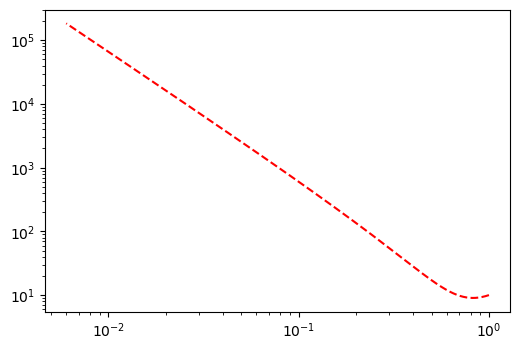

In [17]:
g,dg=result[:,0],result[:,1]
fig=plt.figure(dpi=100)
plt.loglog(r,abs(g),'r--')
#plt.plot(r,dg,'g--')
plt.show()

In [5]:
from scipy.integrate import solve_bvp
from const import Const

In [40]:
class Check(object):
    def __init__(self,a,M_p):
        self.a=a
        self.M_p=M_p
        self.con=Const(a)
    def fun(self,Z,r,p,others):
        P,T,M,L=Z
        L_s,ST=p
        g,alpha,beta=others
        dP=self.con.c_P*M*P/(T*r**2)
        dT=[min(self.con.c_T*1e24*abs(L[i])*P[i]**(alpha+1)*T[i]**(beta-4)/M[i],g*(T[i]*dP[i]/P[i])) for i in range(len(P))]

        dM=self.con.c_M*r**2*P/T
        dL=[1e-24*self.con.M_e*self.con.T_0*dM[i]*ST*(dT[i]==g*(T[i]*dP[i]/P[i])) for i in range(len(P))]
        return np.vstack([dP,dT,dM,dL])
    
    def bc(ya,yb,p):
        L_s,ST=p
        return np.array([ya[0]-1,ya[1]-1,ya[2]-self.M_p,ya[3]-L_s,yb[0]-5.0,yb[1]-1e-3])
    
    def fun_i(self,Z,r,p):
        self.fun(Z,r,p,self.others)
        
    def solve(self,L_s,ST):
        c_P,c_T,c_M=self.con.cal_const()
        g,alpha,beta=self.con.g_ad,self.con.alpha,self.con.beta
        R_in,R_out=self.con.R_p,self.con.R_out

        r=np.linspace(1,R_in/R_out,5)
        ya=(1.,1.,self.M_p,L_s)
        Z=np.ones((4,r.size))
        p_0=[L_s,ST]
        self.others=(g,alpha,beta)
        result=solve_bvp(self.fun_i,self.bc,r,Z,p=p_0)
        return result.p[0],result.p[1]

In [41]:
ce=Check(0.3,5.25326633165829)
ce.solve(158,0.0004)

ValueError: `x` must be strictly increasing.

In [20]:
np.ones(5)*3

array([3., 3., 3., 3., 3.])